# Package Required

In [1]:
from imageio import imread
from scipy import misc, ndimage
from matplotlib import pyplot as plt
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from numpy import array
import numpy as np
import math
from PIL import Image, ImageDraw

# Read Image and Preprocessing

(276, 363)


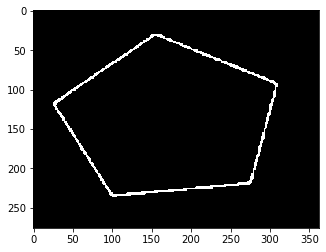

In [2]:
img = imread('W10LabData/binary.png')
gray= np.uint8(0.212670 * img[:,:,0] + 0.715160 * img[:,:,1] + 0.072169 * img[:,:,2])
gray[gray > 127] = 255
gray[gray < 128] = 0
binarized = gray
# dilation and erosion are applied multiple times to join the two parallel lines and also remove the jagging
binarized = binary_erosion(binary_erosion(binary_erosion(binary_dilation(binary_dilation(binarized)))))
print(binarized.shape)
plt.imshow(binarized, cmap='gray')
plt.show()

# Hough Transform (Week10 Lab Exercise Submission)

HoughTransform_Matrix.shape= (912, 62)


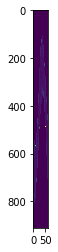

In [3]:
# Submission info - reply them with your name & unikey
studentname = 'Jiye Qiu'
unikey = 'jqiu2929'

# TODO: Complete Hough Transform below (please refer to lab sheet for steps)
# some variable you may want to use: [binarized]
M = binarized.shape[1] #width
N = binarized.shape[0] #height
upper_rho = int(pow(pow(M,2)+pow(N,2),0.5))
lower_rho = -upper_rho
H_height = upper_rho - lower_rho
theta_list = []
for i in range(0, int(20*math.pi)):
    theta_list.append(i/10)
H_width = int(2*math.pi/0.1)
H =np.zeros([H_height, H_width], np.uint8)

for i in range(N):
    for j in range(M):
        for k in range(len(theta_list)):
            theta = theta_list[k]
            rho = i*math.sin(theta) + j*math.cos(theta)
            if binarized[i][j] == 1:
                H[int(rho)+upper_rho][int(10*theta)] += 1

H_max = 0
for i in range(H_height):
    for j in range(H_width):
        if H[i][j] > H_max:
            H_max = H[i][j]

for i in range(H_height):
    for j in range(H_width):
        H[i][j] = 256*H[i][j]/H_max

# support you name your hough_transfrom_matrix as [H], then you can do followings
print('HoughTransform_Matrix.shape=', H.shape)        
plt.imshow(H)
plt.show()

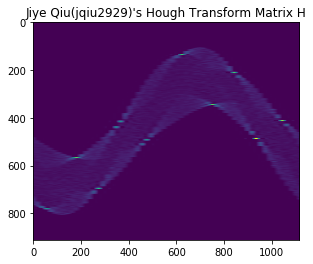

Please right click on the image generated above and save it for your submission.


In [4]:
def scale_H_for_visualization(H):
    # H is too thin to be visualized, so we prepared this function for you to rescale it for a better visualization result
    return ndimage.zoom(H,[1,18])
plt.title("%s(%s)'s Hough Transform Matrix H"%(studentname, unikey))
plt.imshow(scale_H_for_visualization(H))
plt.show()
print("Please right click on the image generated above and save it for your submission.")

# Next Step: Line Detection

In [ ]:
# Complete your code here

# Extension: Inverse Hough Transform

In [ ]:
# Complete your code here